# Import library

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import glob, os
import numpy as np
import cv2
from matplotlib import animation
import math
import warnings

# User defined parameters

In [39]:
cutoff_p = 0.8
project_name = r'\0317_treadmill_rigid-Hao_Shen-2022-03-18'
data_num = 0
vid_num = 0

treadmill_length = 0.235 # m
speed = (math.pi*2+23.5*2)/100*10/109 # m/s

pixels_per_m = 682 / treadmill_length
# moving_average_w = 5
# cutoff_v = 0.03
rat_type = 'Rigid'
# sec_to_compare = 10 * 60
start_sec = 0 # s
end_sec = 5 # s

side = 'l'



In [40]:
glob.glob("*filtered.csv")

['0317_treadmill_rigid_leftDLC_resnet50_0317_treadmill_rigidMar18shuffle1_200000_filtered.csv',
 '0317_treadmill_rigid_rightDLC_resnet50_0317_treadmill_rigidMar18shuffle1_200000_filtered.csv']

In [41]:

glob.glob("*.mp4")

['0317_treadmill_rigid_left.mp4',
 '0317_treadmill_rigid_leftDLC_resnet50_0317_treadmill_rigidMar18shuffle1_200000_filtered_labeled.mp4',
 '0317_treadmill_rigid_right.mp4',
 '0317_treadmill_rigid_rightDLC_resnet50_0317_treadmill_rigidMar18shuffle1_200000_filtered_labeled.mp4',
 'tracker_right.mp4']

# Read in data

In [42]:
csv_path = r"C:\Users\haosh\Documents\Lab\Behavior\DeepLabCut" + project_name+ r"\videos"
os.chdir(csv_path)
df = pd.read_csv(glob.glob("*filtered.csv")[data_num], header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,scorer,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...,DLC_resnet50_0317_treadmill_rigidMar18shuffle1...
1,bodyparts,crest,crest,crest,hip,hip,hip,knee,knee,knee,ankle,ankle,ankle,tip,tip,tip
2,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
3,0,1157.4161376953125,350.3560791015625,0.2728053629398346,1170.4991455078125,420.9176940917969,0.9998787641525269,1112.7928466796875,465.6470031738281,0.998245120048523,1200.248779296875,541.9302368164062,0.9998894929885864,1166.073486328125,605.0994262695312,0.9993231296539307
4,1,1157.4161376953125,350.3622741699219,0.28102514147758484,1170.5341796875,420.937744140625,0.9998773336410522,1112.81982421875,465.6812438964844,0.9982731342315674,1200.275390625,541.9302368164062,0.9998912811279297,1166.0843505859375,605.0994262695312,0.99931800365448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,535,1118.48046875,364.3946228027344,0.998403012752533,1107.4669189453125,442.2466125488281,0.9995902180671692,1033.03857421875,479.56439208984375,0.9998038411140442,1111.13134765625,556.3497924804688,0.9999740123748779,1044.4327392578125,617.5020141601562,0.999868631362915
539,536,1110.9833984375,365.3321228027344,0.9994291663169861,1099.724609375,442.9334411621094,0.9982093572616577,1027.097900390625,479.93182373046875,0.9999144077301025,1106.3927001953125,556.3497924804688,0.9999798536300659,1039.883544921875,618.9371948242188,0.9996811151504517
540,537,1104.097900390625,366.4354553222656,0.9985952973365784,1094.668212890625,444.1537780761719,0.9992547631263733,1021.9517211914062,481.5527038574219,0.9998063445091248,1103.668701171875,557.7002563476562,0.9999076128005981,1039.883544921875,620.7132568359375,0.9995598196983337
541,538,1099.5648193359375,366.4354553222656,0.9979000091552734,1090.3482666015625,444.1537780761719,0.9996160268783569,1019.1279907226562,481.5527038574219,0.9998756647109985,1102.6976318359375,557.7002563476562,0.999951958656311,1038.626708984375,620.7132568359375,0.9993317723274231


# Replace coordinates with p less than cutoff_p to be np.nan

In [43]:
body_parts = df.iloc[1].unique()[1:]

length = df.shape[0] - 3
body_part_arr = np.empty((length, 1))


for body_part in body_parts:
    body_part_df = df[df.columns[df.iloc[1] == body_part]]
    body_part_temp = body_part_df.iloc[3:, 0:3]
    body_part_temp_x = np.array(body_part_temp.apply(lambda x:np.nan if float(x.values[2]) < cutoff_p \
                                                     else float(x.values[0]), axis=1)).reshape(-1,1)

    body_part_temp_y = np.array(body_part_temp.apply(lambda x:np.nan if float(x.values[2]) < cutoff_p \
                                                     else float(x.values[1]), axis=1)).reshape(-1,1)
    body_part_arr = np.hstack((body_part_arr, body_part_temp_x, body_part_temp_y))

body_part_arr = body_part_arr[:, 1:]

print(f'Counts of np.nan is {np.sum(np.isnan(body_part_arr))}')
pd.DataFrame(body_part_arr)

Counts of np.nan is 148


,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,1170.499146,420.917694,1112.792847,465.647003,1200.248779,541.930237,1166.073486,605.099426
1,NaN,NaN,1170.534180,420.937744,1112.819824,465.681244,1200.275391,541.930237,1166.084351,605.099426
2,NaN,NaN,1171.266113,421.001709,1114.660034,465.681244,1201.936401,541.930237,1169.216064,605.099426
3,NaN,NaN,1172.068604,421.510315,1115.915771,465.647003,1203.626953,540.229492,1174.294678,602.890930
4,NaN,NaN,1172.859619,421.587219,1117.541504,465.383240,1206.473267,540.027405,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
535,1118.480469,364.394623,1107.466919,442.246613,1033.038574,479.564392,1111.131348,556.349792,1044.432739,617.502014
536,1110.983398,365.332123,1099.724609,442.933441,1027.097900,479.931824,1106.392700,556.349792,1039.883545,618.937195
537,1104.097900,366.435455,1094.668213,444.153778,1021.951721,481.552704,1103.668701,557.700256,1039.883545,620.713257
538,1099.564819,366.435455,1090.348267,444.153778,1019.127991,481.552704,1102.697632,557.700256,1038.626709,620.713257


# Interpolate the np.nan smoothly based on start and end coordinate

In [44]:
for c in range(body_part_arr.shape[1]):
    # Fill in nan in the front
    if np.isnan(body_part_arr[0, c]):
        for r in range(1, body_part_arr.shape[0]):
            if np.isnan(body_part_arr[r, c]):
                continue
            else:
                body_part_arr[:r, c] = body_part_arr[r, c]
                break
    
    # Fill in nan at the back
    if np.isnan(body_part_arr[-1, c]):
        for r in range(body_part_arr.shape[0]-2, -1, -1):
            if np.isnan(body_part_arr[r, c]):
                continue
            else:
                body_part_arr[r+1:, c] = body_part_arr[r, c]
                break
    
    # Fill in nan in the center
    null_bool = np.isnan(body_part_arr[:, c]) * 1
    indicater_vec = null_bool[:-1] - null_bool[1:]
    neg_idx_start = []
    pos_idx_stop = []
    for i in range(len(indicater_vec)):
        if indicater_vec[i] == -1:
            neg_idx_start.append(i + 1)
        elif indicater_vec[i] == 1:
            pos_idx_stop.append(i + 1)
            
    assert(len(neg_idx_start) == len(pos_idx_stop))
    for i in range(len(neg_idx_start)):
        assert(neg_idx_start[i] < pos_idx_stop[i])
        start_val = body_part_arr[neg_idx_start[i] - 1, c]
        end_val = body_part_arr[pos_idx_stop[i], c]
        part = (end_val - start_val) / (pos_idx_stop[i] - neg_idx_start[i] + 1)
        idx = neg_idx_start[i]
        while idx < pos_idx_stop[i]:
            body_part_arr[idx, c] = start_val + part
            start_val += part
            idx += 1

print(f'Counts of np.nan is {np.sum(np.isnan(body_part_arr))}')
body_part_arr

Counts of np.nan is 0


array([[1153.89257812,  372.57644653, 1170.49914551, ...,  541.93023682,
        1166.07348633,  605.09942627],
       [1153.89257812,  372.57644653, 1170.53417969, ...,  541.93023682,
        1166.08435059,  605.09942627],
       [1153.89257812,  372.57644653, 1171.26611328, ...,  541.93023682,
        1169.21606445,  605.09942627],
       ...,
       [1104.09790039,  366.43545532, 1094.66821289, ...,  557.70025635,
        1039.88354492,  620.71325684],
       [1099.56481934,  366.43545532, 1090.3482666 , ...,  557.70025635,
        1038.62670898,  620.71325684],
       [1098.47875977,  366.43545532, 1089.75854492, ...,  557.70025635,
        1037.23815918,  620.71325684]])

# Plot Gait

Text(0, 0.5, 'Distance (m)')

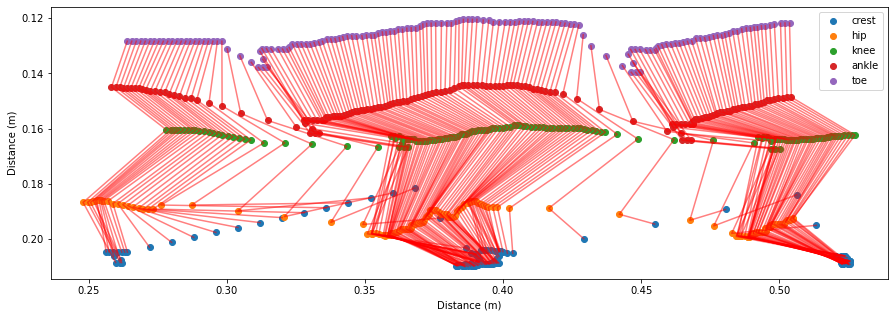

In [45]:
%matplotlib inline
vid = glob.glob("*.mp4")[vid_num]
cap = cv2.VideoCapture(vid)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

x_step = 1 / fps * speed * pixels_per_m

x_idx = np.arange(0,10,2)
y_idx = np.arange(1,10,2)

start = round(start_sec * fps)
end = round(end_sec * fps)

fig, ax = plt.subplots(figsize = (15, 5))

x_arr = []
y_arr = []
for num, i in enumerate(np.arange(start, end)):
    x_pos = x_step * num
    if side == 'l':
        x = width - body_part_arr[i,x_idx] + x_pos
    else:
        x = body_part_arr[i,x_idx] + x_pos
    plt.plot(x /pixels_per_m , body_part_arr[i,y_idx]/pixels_per_m, c='r', alpha=0.5)
    x_arr.append(list(x))
    y_arr.append(list(body_part_arr[i,y_idx]))

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

body_parts = ['toe', 'ankle', 'knee', 'hip', 'crest']

for j in reversed(range(5)):
    ax.scatter(x_arr[:, j]/pixels_per_m, y_arr[:, j]/pixels_per_m, label=body_parts[j])

ax.legend()

ax.invert_yaxis()
# ax.axis('off')
ax.axis('equal')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')

# Save the frames of the videos

In [46]:
if not os.path.isdir('frames'):
    os.mkdir('frames')
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite('frames/' + str(i) + '.jpg', frame)
        i += 1

# Animate the gait

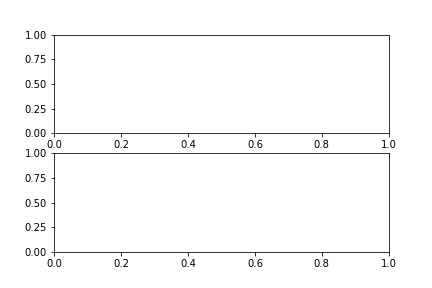

In [47]:
%matplotlib widget
fig, ax = plt.subplots(2,1)
# plt.title('Trajectory of Rat with Soft Implantation')
# plt.xticks(range(width), np.arange(width)/pixels_per_m*100)

def animate(i):
    ax[0].clear()
    ax[1].clear()
    
    idx = np.arange(start, end)
    im = plt.imread('frames/' + str(idx[i])+'.jpg')
    ax[0].imshow(im)
    ax[0].plot(body_part_arr[idx[i],x_idx], body_part_arr[idx[i],y_idx], c='r')
    
    if i < 30:
        for j in range(i+1):
            ax[1].plot(x_arr[j, :]/pixels_per_m, y_arr[j, :]/pixels_per_m,  c='r')
    else:
        for j in range(i-29, i+1):
            ax[1].plot(x_arr[j, :]/pixels_per_m, y_arr[j, :]/pixels_per_m, c='r')
            
            
    ax[1].invert_yaxis()
    ax[1].axis('equal')
    # ax[1].set_xlim([600, 2600])
    # ax[1].set_ylim([1100, 500])
    ax[0].axis('off')
    # ax[1].axis('off')
    
#     if i < 150:
#         ax[1].plot(speed[:i+1])
#         for j, body_part in enumerate(body_parts):
#             x_i = j*2
#             y_i = x_i + 1
#             ax[0].plot(body_part_arr[:i+1, x_i], body_part_arr[:i+1, y_i], lw=0.5, label=body_part)
#     else:
#         ax[1].plot(speed[i-149:i+1])
#         for j, body_part in enumerate(body_parts):
#             x_i = j*2
#             y_i = x_i + 1
#             ax[0].plot(body_part_arr[i-149:i+1, x_i], body_part_arr[i-149:i+1, y_i], lw=0.5, label=body_part)

#     ax[0].legend(bbox_to_anchor=(1.31,1))
#     ax[0].set_title('Trajectory of Rat with '+ rat_type +' Implantation')
#     ax[0].set_xticks(np.arange(0, width, 200), np.round(np.arange(0, width, 200)/pixels_per_m*100,1))
#     ax[0].set_yticks(np.arange(0, height, 200), np.round(np.arange(0, height, 200)/pixels_per_m*100,1))
#     ax[0].set_xlabel('Distance (cm)')
#     ax[0].set_ylabel('Distacne (cm)')

#     ax[1].set_title('Body Center Real Time Speed of Rat with '+ rat_type +' Implantation')
#     ax[1].set_xticks(np.arange(0, 151, 25), np.round(np.arange(0, 151, 25) / fps, 1))
#     ax[1].set_xlabel('Time (s) ')
#     ax[1].set_ylabel('Speed (m/s)')
#     ax[1].set_ylim([0, 1.6])
    
#     if speed[i] < cutoff_v:
#         ax[1].annotate('Stationary', (0.8,0.9), textcoords='axes fraction', size=10)
#     else:
#         ax[1].annotate('Moving', (0.8, 0.9), textcoords='axes fraction', size=10)
        
anim = animation.FuncAnimation(fig, animate, frames=end - start, interval=1000/fps, repeat=False)

# Save the animation

In [48]:
warnings.filterwarnings("ignore")

f = 'tracker.mp4'
writevideo = animation.FFMpegWriter(fps=fps)
anim.save(f, writer=writevideo)
